In [1]:
import torch

In [44]:
# Create MANY more data points (1000 instead of 39)
n_points = 1000

# STEP 1: Create distances (from 1.0 to 20.0 with step 0.5, but scaled up)
# Your original: 39 points from 1.0 to 20.0 with step 0.5
# New: 1000 points covering same range but with smaller step
x = torch.linspace(1.0, 20.0, n_points).reshape(-1, 1)

# STEP 2: Create corresponding times following the same growth pattern
# Your times show: starts slow, accelerates, then slows down (like a logistic curve)
# We'll create a similar S-shaped curve

# Create base logistic/s-shaped curve
base_times = 9* torch.sigmoid((x - 10) / 3) + 1

# Add noise to mimic your irregular data pattern
noise = torch.randn_like(base_times) * 0.5 #djust noise level
y = base_times + noise


In [36]:
import helper_utils2

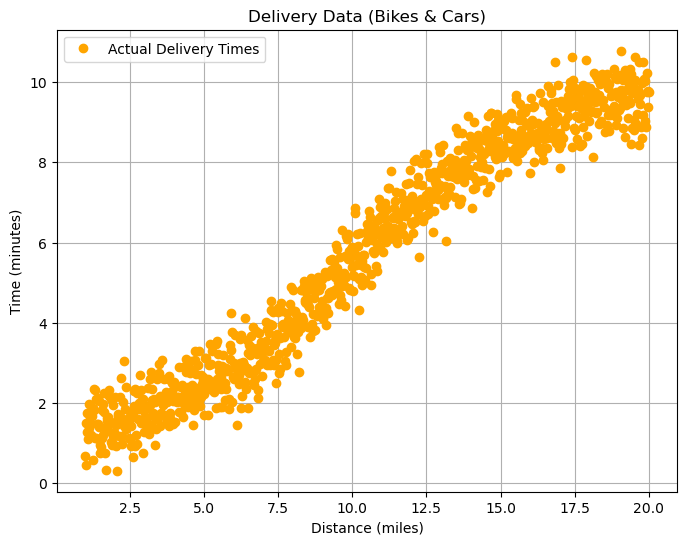

In [45]:
helper_utils2.plot_data(x, y)

In [46]:
x[:10]

tensor([[1.0000],
        [1.0190],
        [1.0380],
        [1.0571],
        [1.0761],
        [1.0951],
        [1.1141],
        [1.1331],
        [1.1522],
        [1.1712]])

In [47]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

x_norm = (x - x_mean) / x_std
y_norm = (y - y_mean)/ y_std

In [48]:
x_norm[:20]

tensor([[-1.7295],
        [-1.7260],
        [-1.7225],
        [-1.7191],
        [-1.7156],
        [-1.7121],
        [-1.7087],
        [-1.7052],
        [-1.7018],
        [-1.6983],
        [-1.6948],
        [-1.6914],
        [-1.6879],
        [-1.6844],
        [-1.6810],
        [-1.6775],
        [-1.6741],
        [-1.6706],
        [-1.6671],
        [-1.6637]])

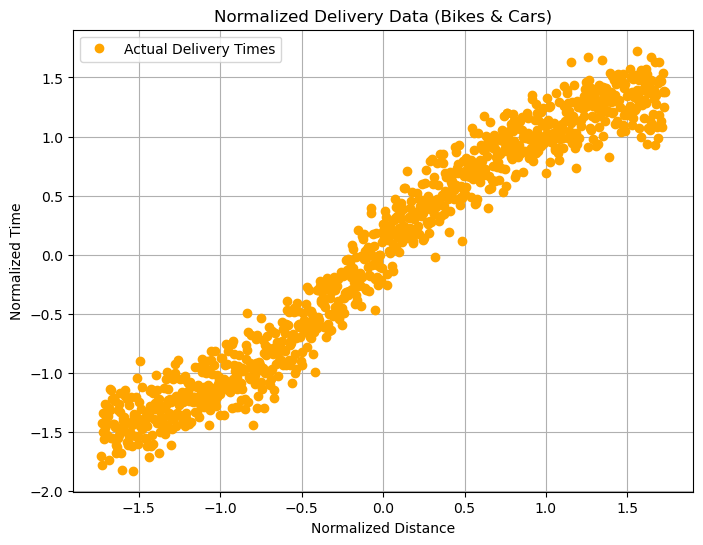

In [49]:
helper_utils2.plot_data(x_norm, y_norm, normalize=True)

In [50]:
import torch.nn as nn
import torch.optim as optim

In [62]:
torch.manual_seed(30)

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

In [63]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

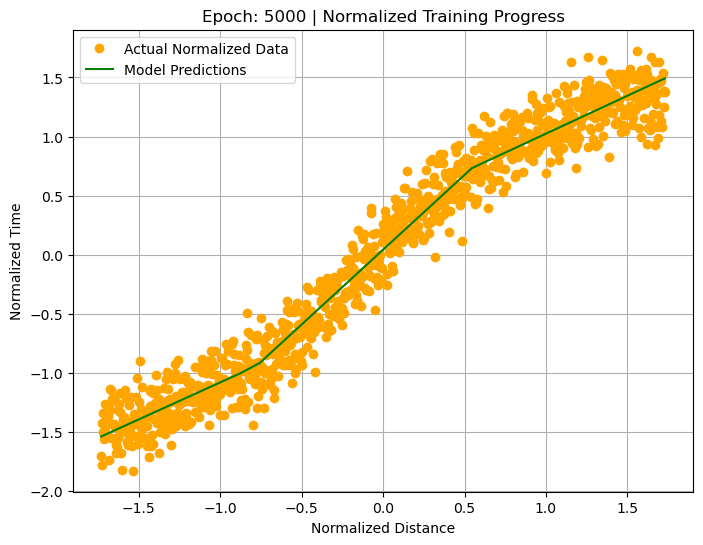

In [64]:
for epoch in range(5000):
    optimizer.zero_grad()
    outputs = model(x_norm)
    loss = loss_function(outputs, y_norm)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        helper_utils2.plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model,
            distances_norm=x_norm,
            times_norm=y_norm
        )